In [1]:
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import string
import nltk # provide frequency count, stop word, dictionary and so on
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

In [2]:
import pandas as pd
df = pd.read_csv('datasets/Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [3]:
df = df.sort_values(by=['label'])

In [4]:
df.shape

(20000, 11)

In [5]:
df0 = df.iloc[:10000, [3, -1]]
df1 = df.iloc[10000:, [3, -1]]

In [6]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    data = re.sub(emoj, '', data)
    return data

def remove_the_at(my_str):
  char = '@'
  result = " ".join(
    filter(
        lambda word: not word.startswith(char), 
        my_str.split()
        )
    )
  my_str = result
  return my_str

def remove_the_http(my_str):
  char = 'http'
  result = " ".join(
    filter(
        lambda word: not word.startswith(char), my_str.split()
        )
    )
  my_str = result
  return my_str

stop = stopwords.words('english')+['would', 'could', "'s", "n't", '"', "'m", "...", "“", "“", "."]
wnl = nltk.WordNetLemmatizer()
# snowball = SnowballStemmer('english')

def prep(tt):
  tok = remove_emojis(tt)
  tok = remove_the_at(tok)
  tok = remove_the_http(tok)
  tok = nltk.word_tokenize(tok.lower())
  tok = [t for t in tok if t not in string.punctuation + "’“”"]
  tok = [t for t in tok if t not in stop]
  tok = [t for t in tok if not t.isnumeric()]
  tok = [wnl.lemmatize(t) for t in tok]
  return tok

In [7]:
df0_tk =df0['post_text'].apply(prep)
df0 = df0.assign(clean_tk = df0_tk)

In [8]:
df1_tk =df1['post_text'].apply(prep)
df1 = df1.assign(clean_tk = df1_tk)

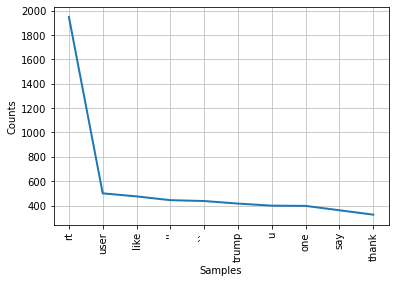

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
fd0_tk = [c for tk in df0['clean_tk'] for c in tk]
fd0 = nltk.FreqDist(fd0_tk)
fd0.plot(10)

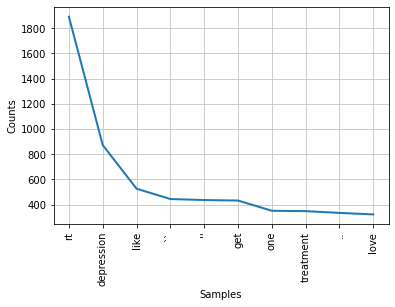

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
fd1_tk = [c for tk in df1['clean_tk'] for c in tk]
fd1 = nltk.FreqDist(fd1_tk)
fd1.plot(10)

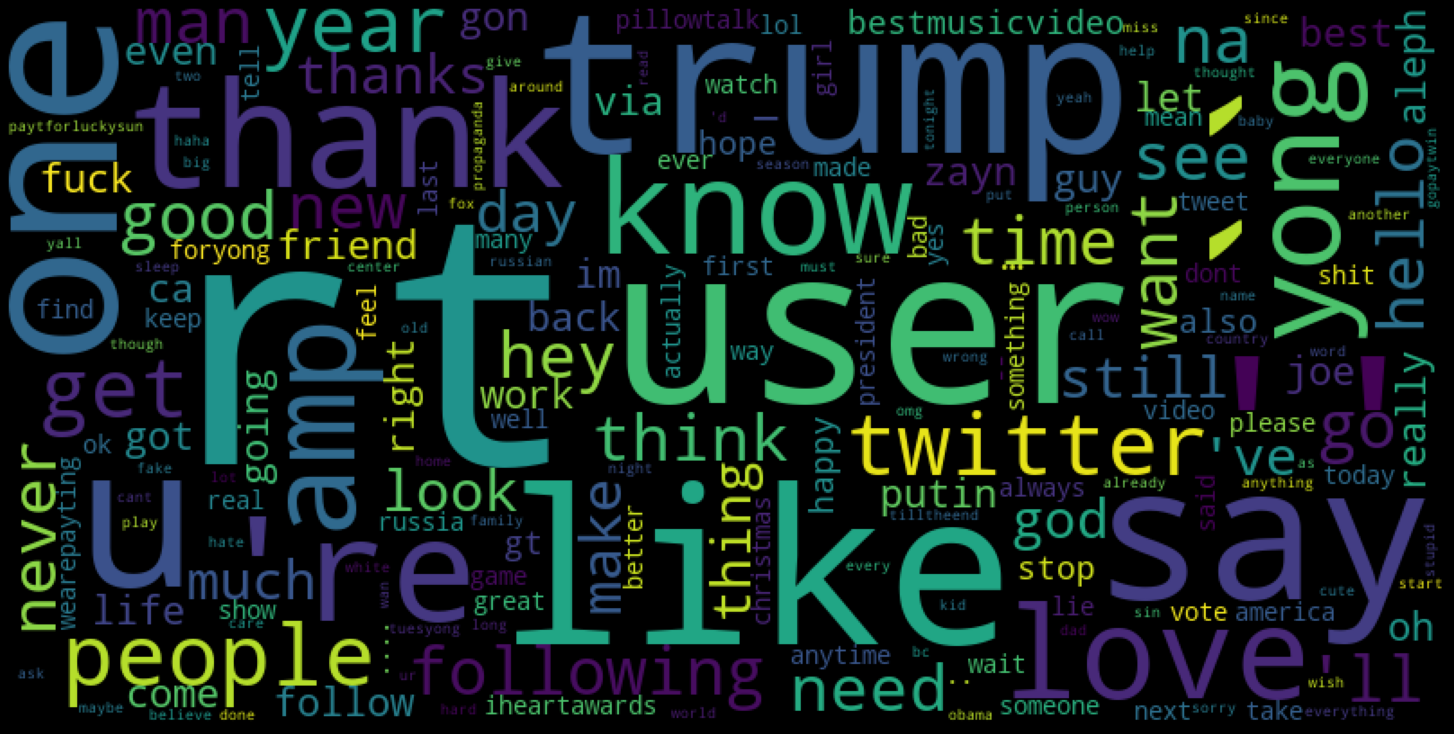

In [11]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(fd0)
plt.figure(figsize=(20,10) , facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

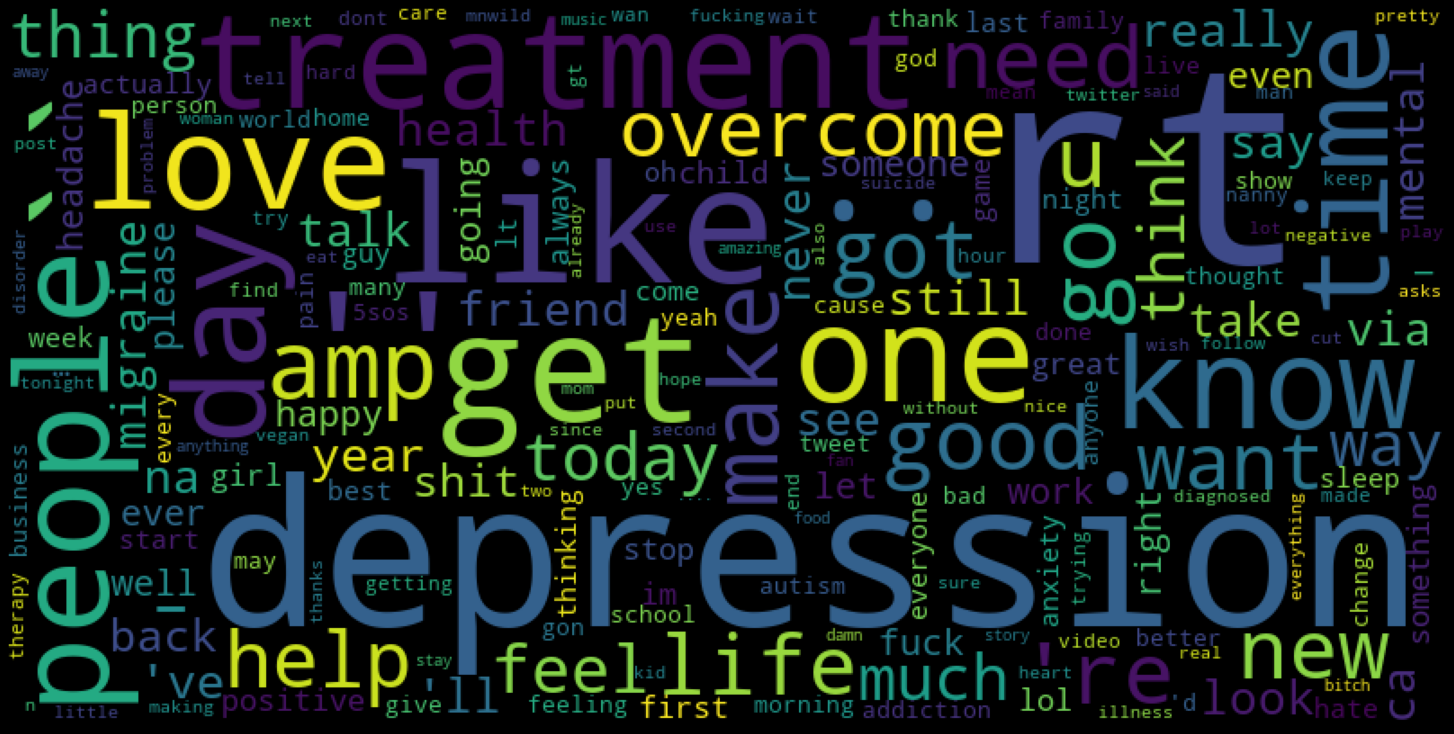

In [12]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(fd1)
plt.figure(figsize=(20,10) , facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()